In [1]:
#Import
# Data manipulation
import pandas as pd
import json
import numpy as np
import math
from datetime import datetime as dt


# Visualizations
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
with open('2021-01-01_1_tzv.json', 'r', encoding="utf-8") as infile:
    tzList = json.load(infile)
tzDF =  pd.json_normalize(tzList["features"][0]["properties"]["data"], sep='_')
def timeconvertfunc(timestamp):
 #The format of tzDF["measurments_height] is in string form and timeseries so this method make it an integer"
  ts = pd.Timestamp(timestamp, tz=None).to_pydatetime()
  ts = 3600*ts.hour + 60*ts.minute + ts.second

  return ts
#Applying above method to the two data frames
tzDF["timeconvert"] = tzDF["time"].apply(timeconvertfunc)
#tzCleanDF["timeconvert"] = tzCleanDF["time"].apply(timeconvertfunc)
tzDF

,test,time,measurements_height,measurements_lat,measurements_lon,timeconvert
0,false,2021-01-01T00:03:52Z,988.271,2.734200,35.950217,232
1,false,2021-01-01T00:03:53Z,988.267,2.734200,35.950217,233
2,false,2021-01-01T00:03:54Z,987.801,2.734201,35.950219,234
3,false,2021-01-01T00:03:55Z,987.804,2.734201,35.950219,235
4,false,2021-01-01T00:03:56Z,988.358,2.734202,35.950220,236
...,...,...,...,...,...,...
51269,false,2021-01-01T23:59:47Z,988.116,2.734205,35.950217,86387
51270,false,2021-01-01T23:59:48Z,988.115,2.734205,35.950217,86388
51271,false,2021-01-01T23:59:53Z,988.111,2.734205,35.950217,86393
51272,false,2021-01-01T23:59:54Z,988.119,2.734205,35.950217,86394


In [3]:
#Finding Optimal Episilon value 
from sklearn.neighbors import NearestNeighbors
'''
X = tzDF["measurements_height"]
X = X.values.reshape(1,-1)
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

#distances = np.sort(distances, axis=0)
#distances = distances[:,1]
#plt.plot(distances)
distances
'''
#Scale the data before applying chunck below 
max_tzDF = max(tzDF["measurements_height"])
min_tzDF = min(tzDF["measurements_height"])
mean_tzDF = tzDF["measurements_height"].mean()

dif_Mean_Max = mean_tzDF - max_tzDF
dif_Mean_Min = mean_tzDF - min_tzDF
min_Mean_Differnces = min(dif_Mean_Max,dif_Mean_Min)

#dif_Mean_Max is the optimal episllon value with this approach 


51273


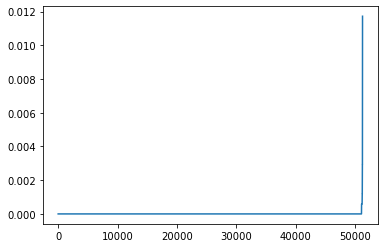

In [4]:
#Scale data
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

pre_Scale_Height = tzDF["measurements_height"].values.reshape(-1,1)
scaler = MinMaxScaler()
scaled = scaler.fit_transform(pre_Scale_Height)
scaled[0][0]



neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(scaled)
distances, indices = nbrs.kneighbors(scaled) 
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
max(distances)


# Max occures when x = 5998

print(np.argmax(distances,axis=0))
distances

#distances
#np.argmax(a, axis=1)
'''
max_tzDF = max(scaled)
min_tzDF = min(scaled)
mean_tzDF = scaled.mean()
dif_Mean_Max = mean_tzDF - max_tzDF
dif_Mean_Min = mean_tzDF - min_tzDF
min_Mean_Differnces = min(dif_Mean_Max,dif_Mean_Min)
print(min_Mean_Differnces)
'''
distances = np.sort(distances, axis=0)
#distances = distances[distances[:,1]]
#plt.plot(distances)

#distances.shape()




In [5]:
#NEAREST NEIGHBOR
from sklearn.neighbors import NearestNeighbors
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
pre_Scale_Height = tzDF["measurements_height"].values.reshape(-1,1)

scaler = MinMaxScaler()

scaled = scaler.fit_transform(pre_Scale_Height)
nbrs = NearestNeighbors(n_neighbors=3, metric='cosine').fit(scaled)
distances, indices = nbrs.kneighbors(scaled)
m = DBSCAN(eps=0.55408633, min_samples=4).fit(distances)

#clusters = m.lables_

colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
#plt.scatter(X[:,0], X[:,1], c=vectorizer(clusters))
"""
distances = distances[:,2]
distances = np.sort(distances, axis=0)
plt.plot(distances)
plt.show()
distances[0].max()
indices
"""

'\ndistances = distances[:,2]\ndistances = np.sort(distances, axis=0)\nplt.plot(distances)\nplt.show()\ndistances[0].max()\nindices\n'

# Applying DBSCAN

In [7]:
from sklearn.neighbors import NearestNeighbors
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
#Scaling
pre_Scale_Height = tzDF["measurements_height"].values.reshape(-1,1)
pre_Scale_Time = tzDF["timeconvert"].values.reshape(-1,1)
scaled = scaler.fit_transform(pre_Scale_Height)
scaled_Two = scaler.fit_transform(pre_Scale_Time)
""""
args:
A dataframe, number of neighbors, minmium sample points, and an 
episilon value for the nearest neighbor algorithm to be executed.
return:
    Nothing a DBSCAN algorithm is shown on the dataset graphically.
"""

def make_DBSCAN(DataFrame,numNeigh,min_Samp,Episilon):
    #Input for the algorithm
    
    
    #Scaling the height of the data between 0 & 1
    scaler = MinMaxScaler()

    scaled_Two = scaler.fit_transform(pre_Scale_Time)
    nbrs = NearestNeighbors(n_neighbors = numNeigh).fit(scaled)
    distances, indices = nbrs.kneighbors(scaled) 

    distances = np.sort(distances, axis=0)
    distances = distances[:,4]
    
    db = DBSCAN(eps = Episilon,  min_samples = min_Samp)
    db.fit(scaled)
    y_pred = db.fit_predict(scaled)
    plt.figure(figsize=(20,12))
    plt.title("DBSCAN")
    plt.scatter(pre_Scale_Time,pre_Scale_Height,c=y_pred, cmap='Paired',s=10)
    print(len(set(db.labels_)))
   
    
#One common approach is to make minPoints = log(number of points)
ln_Data_Points= np.log(5990)
 


#Varying max min points